In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Graphing model without immune reaction

In [2]:
x = np.arange(0, 10**4, 0.1)  # Time array
T0 = 10**4                    # Max temperature
l = 0.001                     # Lambda
T_init = 10**3                # Initial condition for numerical solution

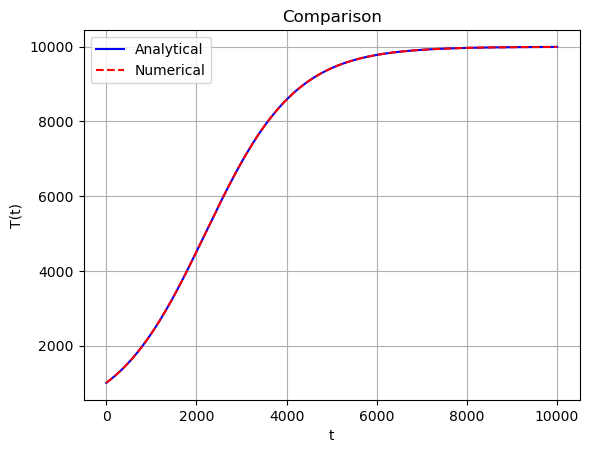

In [3]:
def analytical(T0, l, t):
    C = T0/10**3 - 1
    return T0 / (1 + np.exp(-l*t)*C)

def numerical(T0, l, t, T_init):
    T_curr = T_init
    T_next = np.zeros_like(t)
    T_next[0] = T_curr
    
    dt = t[1] - t[0]
    
    for n in range(1, len(t)):
        T_curr = T_curr + dt * l * T_curr * (1 - T_curr / T0)
        T_next[n] = T_curr

    return T_next

def draw():
    plt.plot(x, analytical(T0, l, x), label="Analytical", color='blue')
    plt.plot(x, numerical(T0, l, x, T_init), label="Numerical", color='red', linestyle='dashed')
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("T(t)")
    plt.grid(True)
    plt.title("Comparison")
    plt.show()

draw()

#### Graphic model with immune reaction

In [4]:
x = np.arange(0, 10**4, 0.1)  # Time array
T0 = 10**4                    # Max temperature
l = 0.001                     # Lambda
T_init = 10**3                # Initial condition for numerical solution

In [5]:
def numerical_immune(T0, l, t, T_init, k1, k2, e0):
    T_curr = T_init
    T_next = np.zeros_like(t)
    T_next[0] = T_curr
    
    dt = t[1] - t[0]
    
    for n in range(1, len(t)):
        growth_term = dt * l * T_curr * (1 - T_curr / T0)
        immune_term = dt * (k1 * k2 * e0) * T_curr / (k2 + k1 * T_curr)
        
        # print(f"Step {n}: T_curr = {T_curr}, Growth term = {growth_term}, Immune term = {immune_term}")
        
        T_curr = T_curr + growth_term - immune_term
        T_next[n] = T_curr

    return T_next

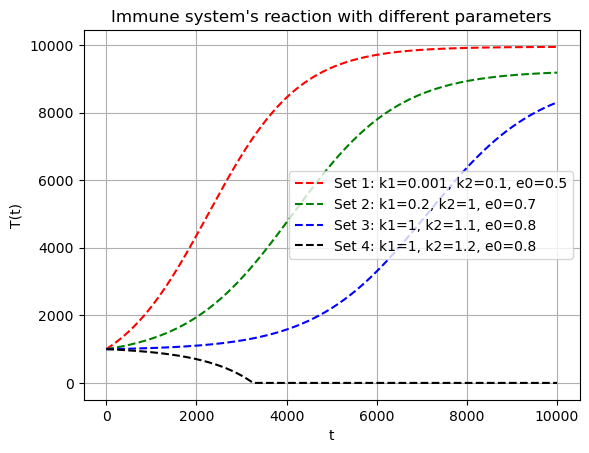

In [6]:
param = [
    {"k1": 0.001, "k2": 0.1, "e0": 0.5},# k1 - interaction rate, how fast immune system interacts with target
    {"k1": 0.2, "k2": 1, "e0": 0.7},    # k2 - saturation of immune response
    {"k1": 1, "k2": 1.1, "e0": 0.8},    # e0 - shows how strongly immune response acts on pathogenes
    {"k1": 1, "k2": 1.2, "e0": 0.8}
]

colors = ['red', 'green', 'blue', 'black']
labels = ['Set 1: k1=0.001, k2=0.1, e0=0.5', 
            'Set 2: k1=0.2, k2=1, e0=0.7', 
            'Set 3: k1=1, k2=1.1, e0=0.8',
            'Set 4: k1=1, k2=1.2, e0=0.8'
        ]

def draw(param, colors, labels):

    for idx, params in enumerate(param):
        k1 = params['k1']
        k2 = params['k2']
        e0 = params['e0']
        T_solution = numerical_immune(T0, l, x, T_init, k1, k2, e0)
        plt.plot(x, T_solution, label=labels[idx], color=colors[idx], linestyle='dashed')
    
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("T(t)")
    plt.grid(True)
    plt.title("Immune system's reaction with different parameters")
    plt.show()

draw(param, colors, labels)